In [15]:
import sys
sys.path.insert(0, "/Users/aimachine/PyImage/utils")
import numpy as np
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from plot_utils import multiplotlineX, overlaymultiplotX,overlaymultiplotXSave
from bokeh.plotting import figure, output_file, show
from bokeh.io import export_png, output_notebook
from HoughLine import show_poly_regression

from numpy import convolve

In [16]:
sourcedir = '/Users/aimachine/ResultsWT2/10px/'

In [17]:
def movingaverage(values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

Saving Plot for : ResNetDots-TOverlapTestMovie


Loading BokehJS ...

Coefficients (High -> Low) [-4.34919116e-17  4.29119728e-14 -1.83521971e-11  4.45346480e-09
 -6.73396812e-07  6.54938778e-05 -4.07683628e-03  1.56415942e-01
 -3.42481142e+00  3.73291818e+01 -1.07689323e+02]


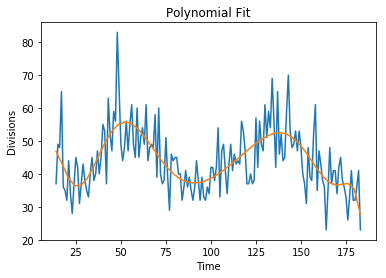

Loading BokehJS ...

/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/site-packages/bokeh/models/sources.py:110: BokehUserWarning: ColumnDataSource's columns must be of the same length. Current lengths: ('x', 170), ('y', 164)
  "Current lengths: %s" % ", ".join(sorted(str((k, len(v))) for k, v in data.items())), BokehUserWarning))


Loading BokehJS ...

Coefficients (High -> Low) [-4.26063697e-17  4.24605676e-14 -1.83653636e-11  4.51531320e-09
 -6.93402252e-07  6.87081069e-05 -4.37433901e-03  1.72364079e-01
 -3.88358139e+00  4.31154073e+01 -1.24346407e+02]


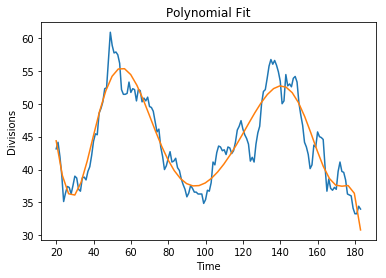

Loading BokehJS ...

In [18]:


Path = os.path.join(sourcedir, '*.txt')
X = sorted(glob.glob(Path))
Names = sorted(glob.glob(Path))
for file in Names:
 Time = []
 Xcord = []
 Ycord = []   
 base = os.path.split(file)[-1]

 Filename = os.path.splitext(base)
 print('Saving Plot for :', Filename[0])
 
 time, X, Y = np.loadtxt(file, delimiter = ',', skiprows = 1, unpack=True)
 
 Time.append(time)
 Xcord.append(X)
 Ycord.append(Y)
 maxtime = np.max(Time)
 mintime = np.min(Time)

 DivisionList = []
 for time in range(int(mintime), int(maxtime) + 1):
     
     timecounter = 0  
     for i in np.nditer(Time):
       
       if(time == i):
            timecounter = timecounter + 1
       
     Div = (time, timecounter)
        
     DivisionList.append(Div)
 X =[]
 Y = []
 Z = []   
 for i in range(10,len(DivisionList)-10):       
   #Bokeh plots
   
   X.append(DivisionList[i][0])
   Y.append(DivisionList[i][1])
   
   
 p = figure(title='Division Counter', x_axis_label='Time', y_axis_label='Division Number')
 p.line(X, Y, legend = "Divisions-Time", line_width = 2)
   
 output_notebook()
 show(p)
 export_png(p, filename=sourcedir + 'DivisionCounter' + Filename[0] + '.png')
 show_poly_regression(X,Y,10)
 
 Z = movingaverage(Y,7)
 q = figure(title='Division Counter', x_axis_label='Time', y_axis_label='Division Number')
 q.line(X, Z, legend = "Divisions-Time", line_width = 2)
   
 output_notebook()
 show(q)
 export_png(q, filename=sourcedir + 'MovAv-DivisionCounter' + Filename[0] + '.png')  
 show_poly_regression(X[len(X)-len(Z):],Z,10)    


